## start up

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import skimage as sk

from scipy import ndimage as ndi

import os
%matplotlib inline

## local files

In [3]:
from src import utils,boudingBox, nanoSegmentation, gui
import dearpygui.dearpygui as dpg
import dearpygui.demo as demo



## DEMO

In [ ]:
dpg.create_context()
dpg.create_viewport(title='Custom Title', width=600, height=600)

demo.show_demo()

dpg.setup_dearpygui()
dpg.show_viewport()
dpg.start_dearpygui()
dpg.destroy_context()

In [4]:
gui.display()

C:/Users/Cewein/python/Nanoparticle-segmentation-classification/img/15kX -FF-Q9-Fe3O4 -0004.tif


## Main script

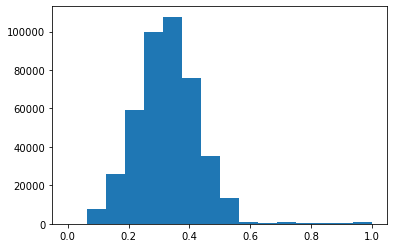

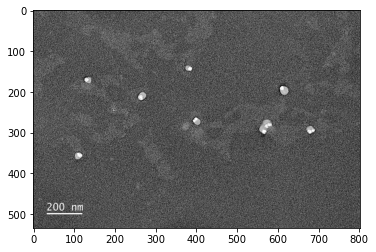

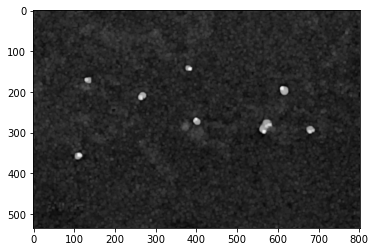

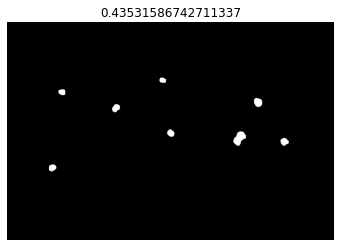

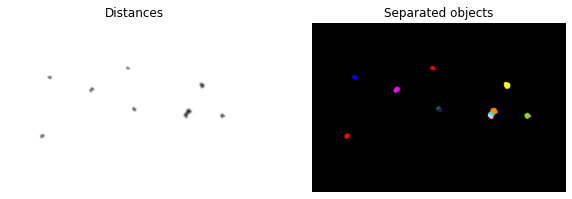

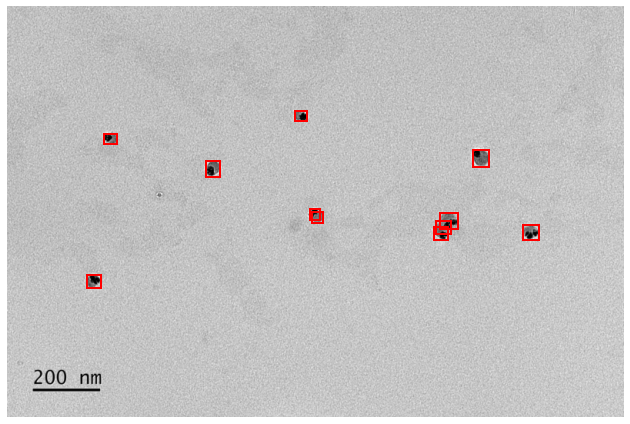

In [20]:
fileName = "15kX -FF-Q9-Fe3O4 -0004"
im2 = utils.openFile(f"img/{fileName}.tif",5)
im2processed = nanoSegmentation.preProcessing(im2,5,1,True)
imBinary2 = nanoSegmentation.thresholdOtsu(im2processed,True)
labels2, markers2 = nanoSegmentation.distanceBasedWatershed(imBinary2,True)
bboxArray = boudingBox.getBoundingBox(255 - im2, labels2,100, True)
boudingBox.exctractParticle(255 - im2, bboxArray,fileName, save=True, display=False)

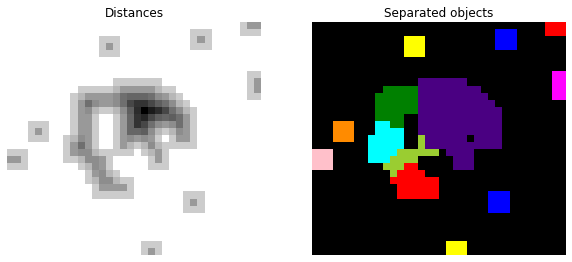

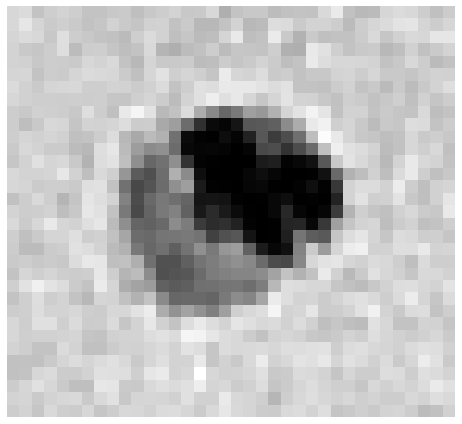

In [22]:
#second pass

im2 = utils.openFile(f"out/{fileName}/output-10.png",1.0)
im2processed = nanoSegmentation.preProcessing(im2,3,0)
imBinary2 = nanoSegmentation.thresholdOtsu(im2processed)
labels2, markers2 = nanoSegmentation.distanceBasedWatershed(imBinary2,True)
_ = boudingBox.getBoundingBox(255 - im2, labels2,250, True)

FileNotFoundError: [Errno 2] No such file or directory: 'out/15kX -FF-Q9-Fe3O4 -0004/output-11.png'

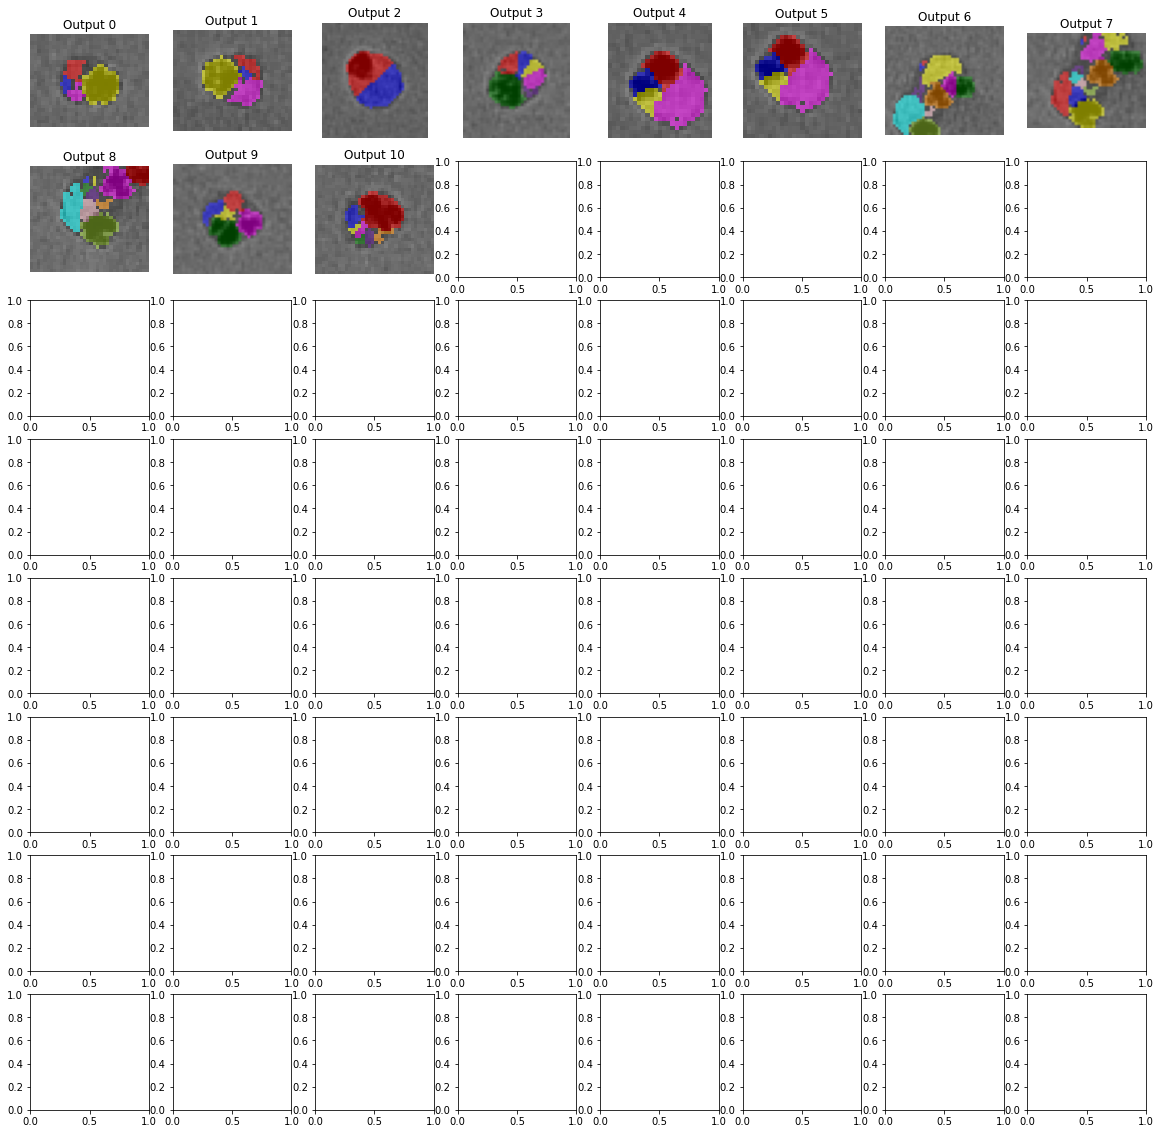

In [23]:
#second pass

fig, ax = plt.subplots(8,8,figsize=(20,20))

for i, ax in enumerate(ax.flat):
    im = utils.openFile(f"out/{fileName}/output-{i}.png",1.0)
    imProcessed = nanoSegmentation.preProcessing(im,7,1)
    imBinary = nanoSegmentation.thresholdOtsu(imProcessed)

    rec = sk.morphology.reconstruction(im * imBinary, im, method='dilation')

    labels, markers = nanoSegmentation.distanceBasedWatershed(nanoSegmentation.thresholdOtsu(np.int_(rec)))

    labelsColorOverlay = sk.color.label2rgb(labels)
    ax.imshow(255-im, cmap="gray")
    ax.imshow(labelsColorOverlay, alpha=0.5)
    ax.set_title(f"Output {i}")
    ax.set_axis_off()

plt.show()

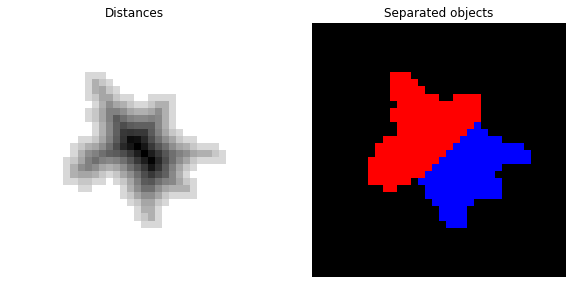

In [7]:
i = 7
im = utils.openFile(f"out/{fileName}/output-{i}.png",1.0)

imProcessed = nanoSegmentation.preProcessing(im,7,1)
imBinary = nanoSegmentation.thresholdOtsu(imProcessed)

rec = sk.morphology.reconstruction(im * imBinary, im, method='dilation')

labels, markers = nanoSegmentation.distanceBasedWatershed(nanoSegmentation.thresholdOtsu(np.int_(rec)),True)